In [1]:
# Random Forest Classification

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('features_30_sec.csv')

X = df.iloc[:, 2:-1].values
y = df.iloc[:, -1].values

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [4]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
from sklearn.preprocessing import LabelEncoder

# Encoding the target variable
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
y_train = labelencoder_y.transform(y_train)
y_test = labelencoder_y.transform(y_test)

In [6]:
from sklearn.ensemble import RandomForestClassifier

# Training the Random Forest model on the training set
classifier = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [7]:
# Predicting the test set results
y_pred = classifier.predict(X_test)

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy Score:", accuracy)

Confusion Matrix:
[[11  0  0  0  0  0  2  0  1  1]
 [ 0 11  0  0  0  0  0  0  0  0]
 [ 2  0 17  4  0  2  0  0  0  2]
 [ 0  0  2 13  5  0  0  0  1  1]
 [ 1  0  1  1 14  0  1  0  5  0]
 [ 0  2  1  0  0 13  0  0  1  1]
 [ 0  0  0  1  0  0 17  0  2  0]
 [ 0  0  0  1  3  1  0 16  1  2]
 [ 1  0  0  0  3  0  0  2  9  0]
 [ 1  1  3  6  0  1  2  0  1 10]]

Accuracy Score: 0.655


In [9]:
from sklearn.metrics import classification_report

# Print the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.73      0.71        15
           1       0.79      1.00      0.88        11
           2       0.71      0.63      0.67        27
           3       0.50      0.59      0.54        22
           4       0.56      0.61      0.58        23
           5       0.76      0.72      0.74        18
           6       0.77      0.85      0.81        20
           7       0.89      0.67      0.76        24
           8       0.43      0.60      0.50        15
           9       0.59      0.40      0.48        25

    accuracy                           0.66       200
   macro avg       0.67      0.68      0.67       200
weighted avg       0.67      0.66      0.65       200



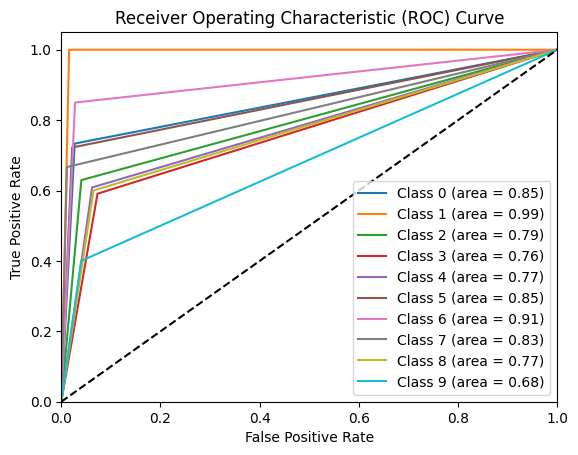

In [10]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_pred_bin[:, i])

# Plot ROC curve for each class
plt.figure()
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()